# EDA To Prediction (DieTanic)

Contents of the Notebook:
Part1: Exploratory Data Analysis(EDA):
1)Analysis of the features.

2)Finding any relations or trends considering multiple features.

Part2: Feature Engineering and Data Cleaning:
1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.

Part3: Predictive Modeling
1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction.


## Part1: Exploratory Data Analysis (EDA)

In [1]:
!pip install kaggle --upgrade

import os
os.environ['KAGGLE_USERNAME'] = 'hardm00n'
os.environ['KAGGLE_KEY'] = '705411ac0f42b6a6e137b07cfb0b188e'

!kaggle competitions download -c titanic
#!unzip '*.zip'  # 타이타닉 데이터셋은 압축되어 있지 않다.

gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('/content/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum()  # 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked 컬럼에 결측치가 있으니까 해결해보자.  
얼머나 살아남았을까?

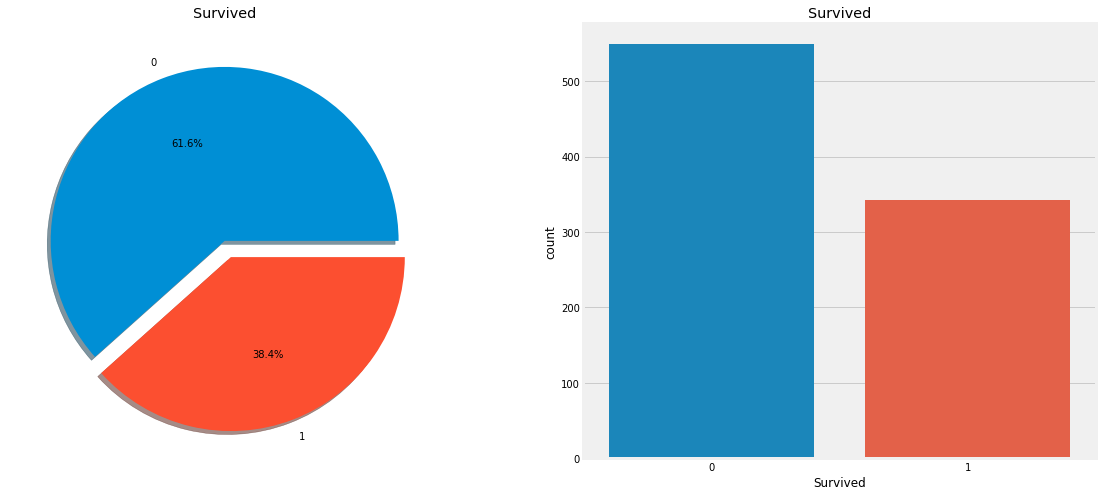

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

그 사고에서 살아남은 승객이 많지 않다는 것은 명백하다.  

891명의 탑승자 중 350명만이 살아남았다. 우리는 데이터에서 더 나은 인사이트를 얻고, 승객의 어떤 카테고리가 살아남았는지, 그리고 누가 살아남지 못했는지 알아보기 위해 더 깊이 파고들 필요가 있다.  

데이터셋의 다양한 특징을 이용해 생존율을 확인해보자. 몇몇 feature로는 Sex, Port of Embarcation, Age, etc.  

먼저 여러 유형의 feature에 대해 이해해보자. 

#### feature 유형

- 범주형 feature : 범주형 변수는 두 개 이상의 범주가 있는 변수이며 해당 feature의 각 값은 범주로 분류될 수 있다. 예를 들어, 성별은 두 가지 범주(남성 및 여성)가 있는 범주형 변수다. 이제 우리는 이러한 변수를 정렬하거나 순서를 지정할 수 없다. Nominal 변수라고도 한다.  
- 데이터셋의 범주형 faeture : Sex, Embarked  
- 순서형 feature : 순서형 변수는 범주형 값과 유사하지만 값 간의 상대적 순서 지정 혹은 정렬이 가능하다는 점이 다르다. 예: 높음, 중간, 짧은 값을 가진 높이와 같은 feature가 있는 경우 높이는 순서형 변수다. 여기서 우리는 변수에서 상대적인 정렬을 할 수 있다. 
- 데이터셋의 순서형 feature : Pclass
- 연속형 feature : 두 점 사이 혹은 열의 최소값 또는 최대값 사이의 값을 취할 수 있는 경우 연속형이라고 한다. 
- 데이터셋의 연속형 feature : Age



### Analysing The Features
### Sex -> Categorical Feature

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

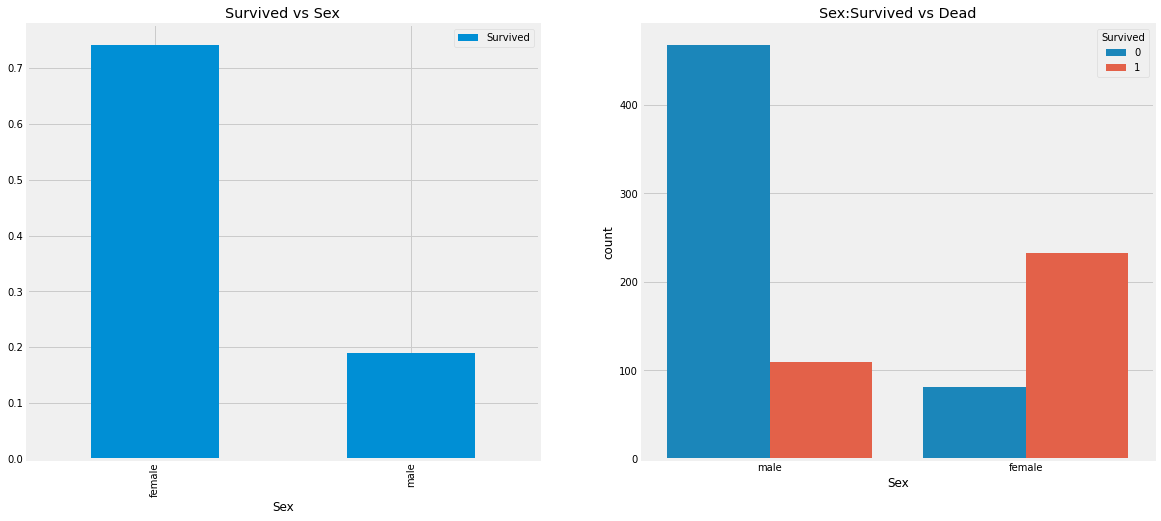

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

이것은 흥미롭다. 배에 타고 있는 남자 수가 여자 수보다 훨씬 많다. 하지만 구조된 여성의 수는 남성의 거의 두 배다. 배에 탑승한 여성의 생존율은 약 75%인 반면 남성은 18-19%다.  
이것은 모델링에 매우 중요한 feature로 보인다. 하지만 이게 최선일까? 다른 feature를 확인해보자. 

### Pclass -> Ordinal Feature

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


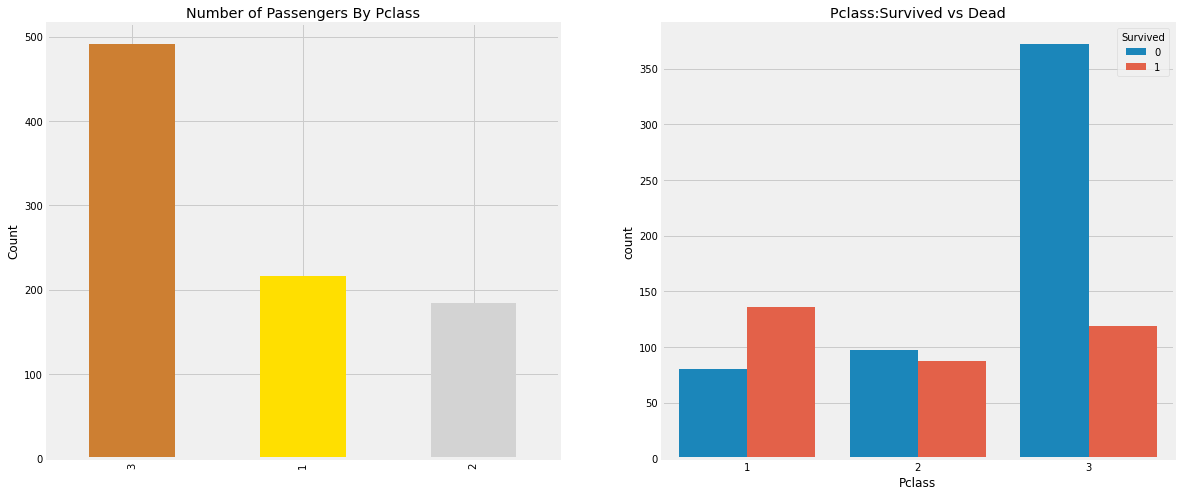

In [10]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

사람들은 돈으로 모든 것을 살 수 없다고 말한다. 하지만 Pclass 1의 승객들이 구조에 있어서 높은 우선순위를 부여받았다는 것을 분명히 알 수 있다. Pclass 3의 승객 수가 훨씬 많았음에도 불구하고, 생존자 수는 25% 정도로 매우 낮다.  
Pclass 1의 경우 생존률이 약 63%인 반면 Pclass 2의 경우 약 48%다. 그래서 돈과 지위가 중요하다. 정말 물질만능주의적인 세상이다.  
조금 더 자세히 살펴보고 다른 흥미로운 관측치가 있는지 확인해보자. Sex and Pclass로 생존률을 확인해보자. 

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

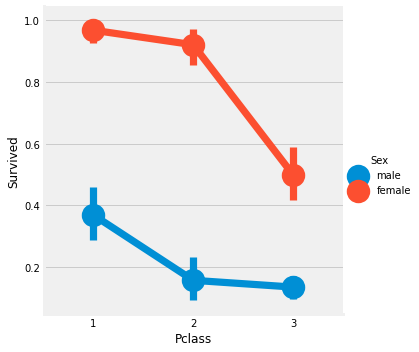

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

이 경우에는 범주형 값을 쉽게 분리할 수 있기 때문에 Factorplot을 사용한다.  
crosstab과 Factorplot을 보면 Pclass 1 여성 94명 중 3명만 사망해 Pclass 1 여성 생존률이 약 95-96%임을 쉽게 추론할 수 있다.  
Pclass에 관계없이 여서이 구조되는 동안 최우선적으로 고려되었다는 것은 명백하다. 심지어 Pclass 1의 남성들도 생존률이 매우 낮다.  
Pclass도 중요한 feature인 것 같다. 다른 feature를 분석해보자. 

### Age -> Continous Feature

In [13]:
print('Oldest Passenger was of : ', data['Age'].max(), 'Years')
print('Youngest Passenger was of : ', data['Age'].min(), 'Years')
print('Average Age on the ship : ', data['Age'].mean(), 'Years')

Oldest Passenger was of :  80.0 Years
Youngest Passenger was of :  0.42 Years
Average Age on the ship :  29.69911764705882 Years


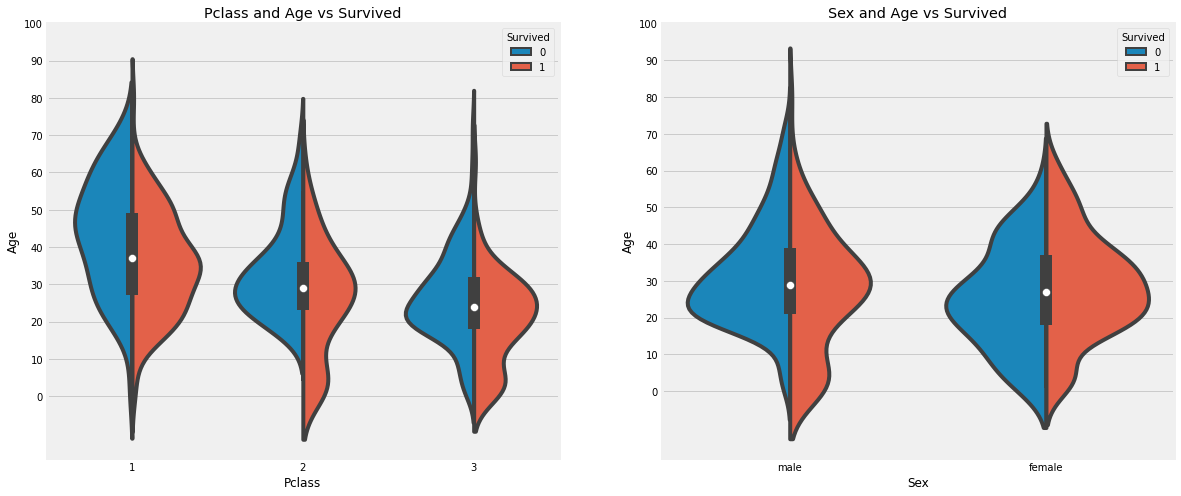

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

관측치 :  
1. 어린이의 수는 Pclass에 따라 증가하며, 10세 이하의 어린이의 생존률은 Pclass에 관계없이 양호한 것으로 보인다. 
2. Pclass 1의 20-50세 승객들의 생존률은 높으며 여성인 경우 더 높다. 
3. 남성의 경우 나이가 들수록 생존률이 낮아진다.  

앞에서 살펴본 것처럼 Age에는 177개의 null값이 있다. 이러한 NaN 값을 대체하기위해 Age의 평균값을 할당할 수 있다.  
하지만 문제는 많은 다양한 연령대의 사람들이 있었다는 것이다. 4살짜리를 29살로 배정할 수는 없다. 승객이 거짓말을 하는 연령대를 확인할 수 있는 방법이 있을까?  
빙고! Name feature를 확인할 수 있다. feature를 보면, 이름들의 인사말이 미스터나 미세스로 되어 있다. 따라서 우리는 Mr., Mrs의 평균값을 각각 그룹에 할당할 수 있다.  

이름에 뭐가 있지? -> feature

In [15]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')  # lets extract the Salutations

자, 여기서는 정규식을 사용하고 있다. [A-Za-z]+).. 그래서 이것은 A-Z, a-z 사이에 있는 문자열 뒤에 점을 찾는 것이다.  
이름으로부터 이니셜을 성공적으로 추출했다. 

In [16]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')  # Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle나 Mme처럼 철자가 틀린 이니셜이 있다. 이것들을 Miss나 다른 값들에 대해서도 대체해보자. 

In [17]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean()  # lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [19]:
# Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [20]:
data.Age.isnull().any()  # so no null values left finally

False

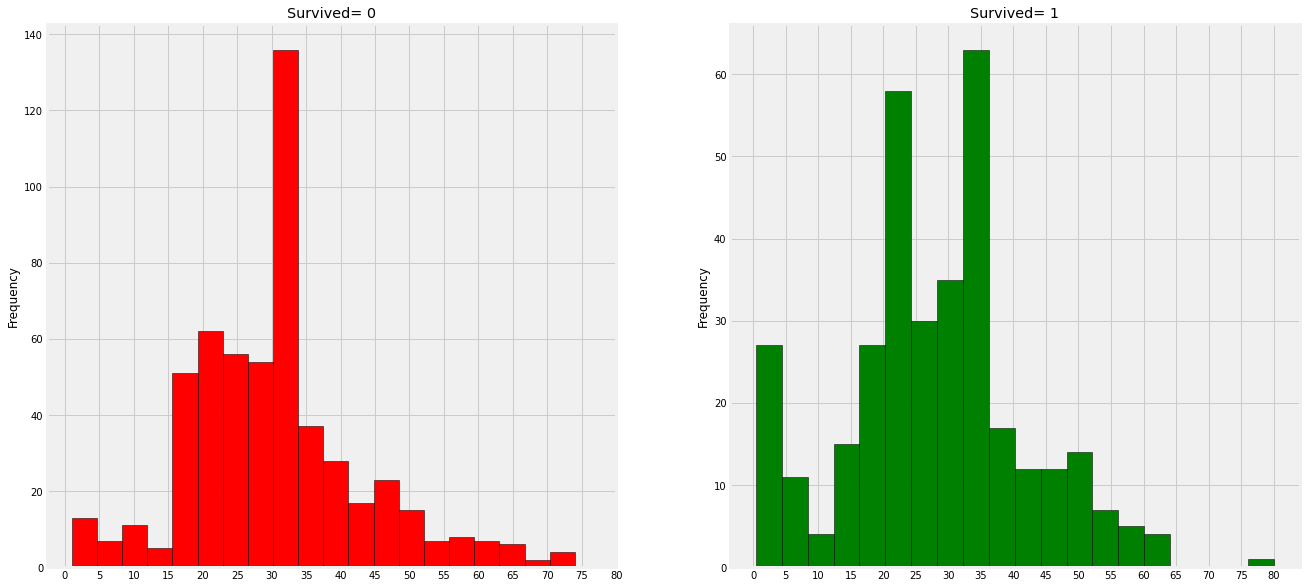

In [21]:
f, ax = plt.subplots(1, 2, figsize=(20., 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived= 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived= 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

관측치 : 
1. 5세 이하의 유아들은 대부분 구조되었다. (여성과 어린이를 우선하는 정책)
2. 최고령 승객은 구조되었다. (80살)
3. 가장 많은 사망자 그룹은 30-40세였다. 

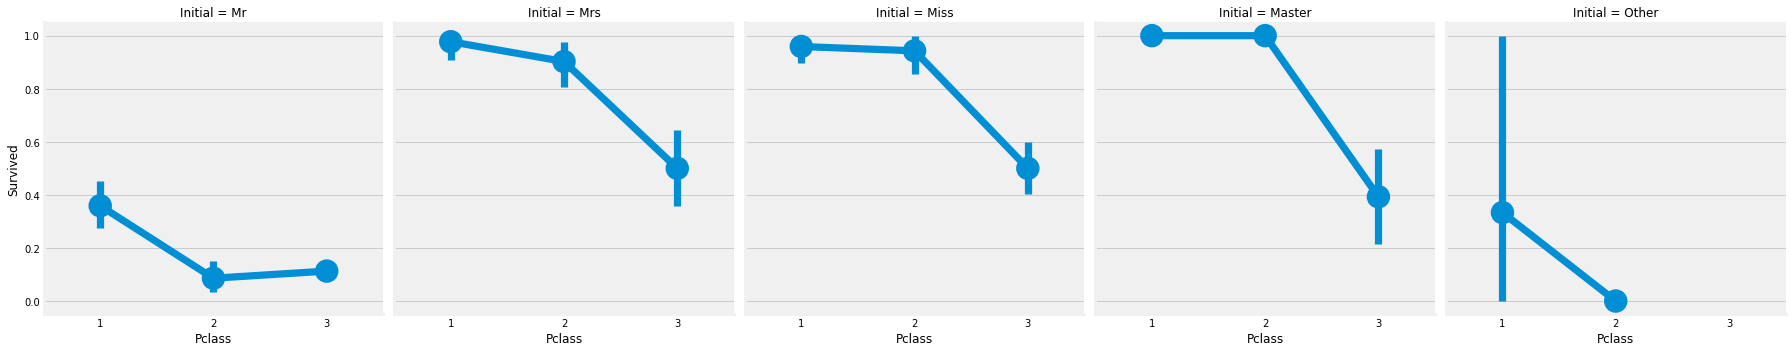

In [22]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

여성과 어린이 먼저 구하는 정책은 클래스에 상관없이 적용된다. 

### Embarked -> Categorical Value

In [23]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

### Chances of Survival by Port of Embarkation

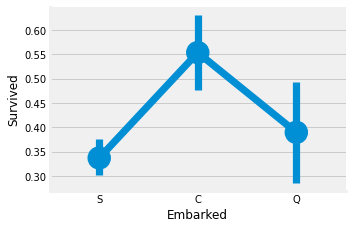

In [24]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

C 항구의 생존률이 약 0.55로 가장 높았고 S 항구의 생존률이 가장 낮았다.

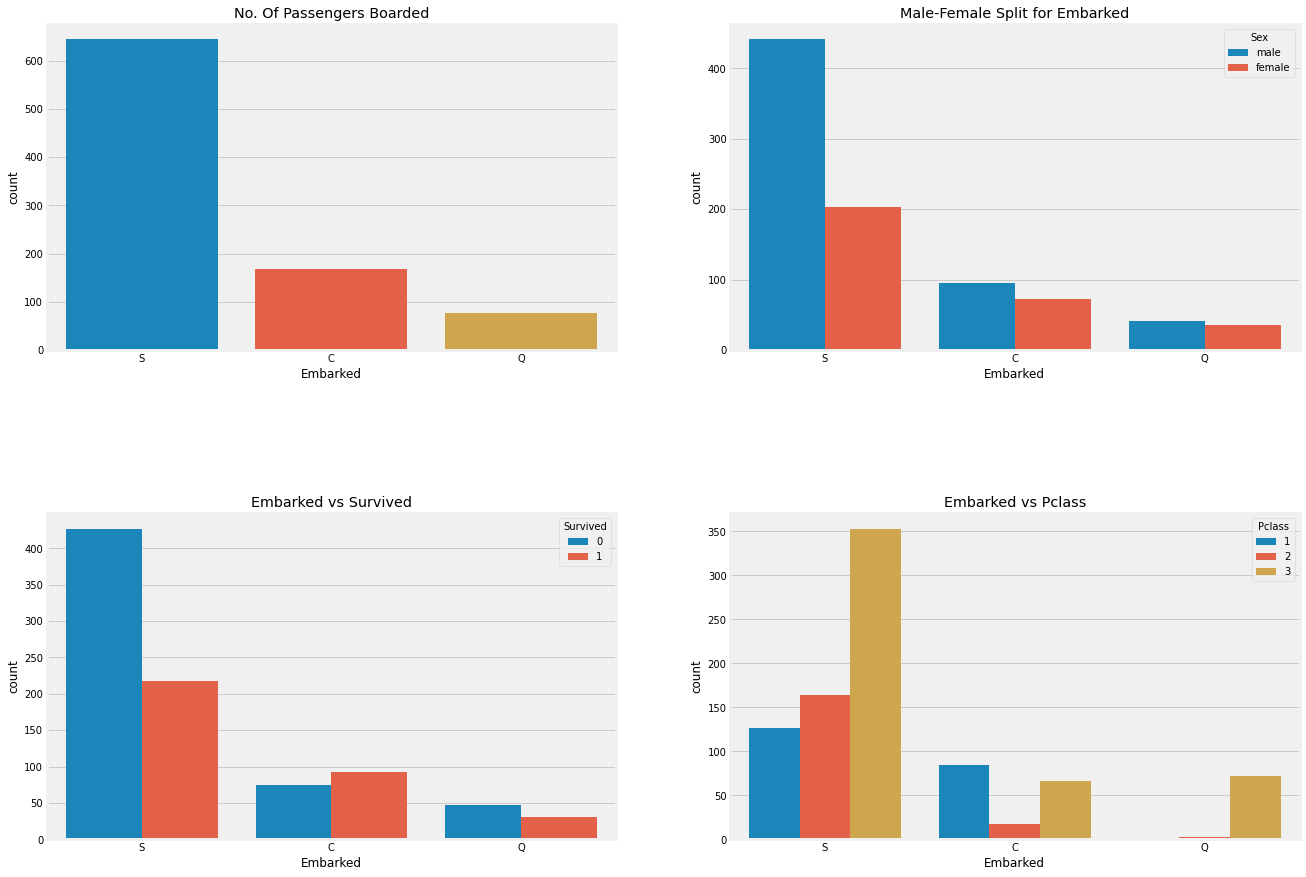

In [25]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

관측치 : 
1. S에서 가장 많은 승객들이 탑승했고, 그들 중 대부분은 Pclass 3다. 
2. C에서 온 승객들 중 상당수가 살아남았기 때문에 운이 좋은 것으로 보인다. 이것의 이유는 아마도 모든 Pclass 1과 Pclass 2 승객들의 구조를 위해서일 것이다. 
3. s는 부자들이 대부분 승선한 것 같다. Pclass 3의 승객 중 81% 정도가 살아남지 못했기 때문에 이곳의 생존 가능성은 낮다. 
4. Q는 승객의 95%가 Pclass 3다. 

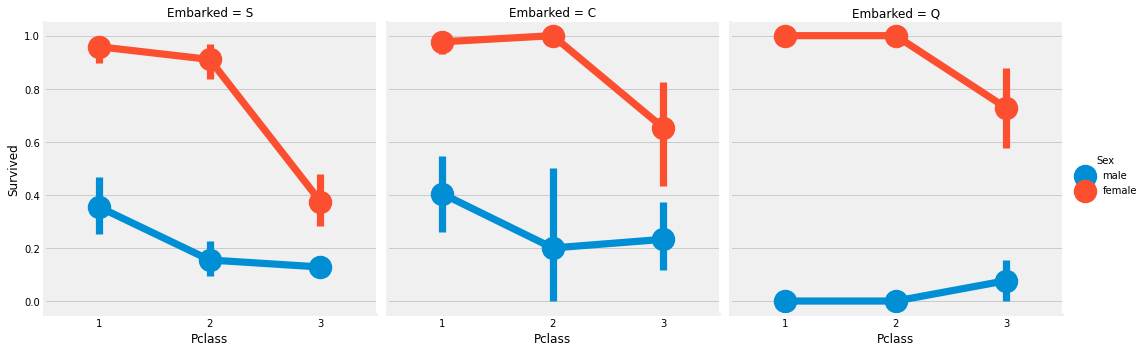

In [26]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

관측치 : 
1. Pclass 1과 Pclass 2에 관계없이 여성의 생존률은 거의 1이다. 
2. Pclass 3 승객의 남녀 모두 생존률이 낮기 때문에 포트 S는 매우 불운해 보인다. (돈 문제)
3. 포트 Q는 거의 모두가 Pclass 3 출신이기 때문에 남성들에게 가장 불행해 보인다. 

### Filling Embarked NaN
포트 S에서 가장 많은 승객이 탑승했기 때문에, 결측치는 S로 채운다. 

In [27]:
data['Embarked'].fillna('S', inplace=True)

In [28]:
data.Embarked.isnull().any()  # Finally No NaN values

False

### SibSip -> Descrete Feature
이 feature는 탑승객이 혼자인지, 아니면 가족과 함께인지를 나타낸다. 
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife

In [29]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


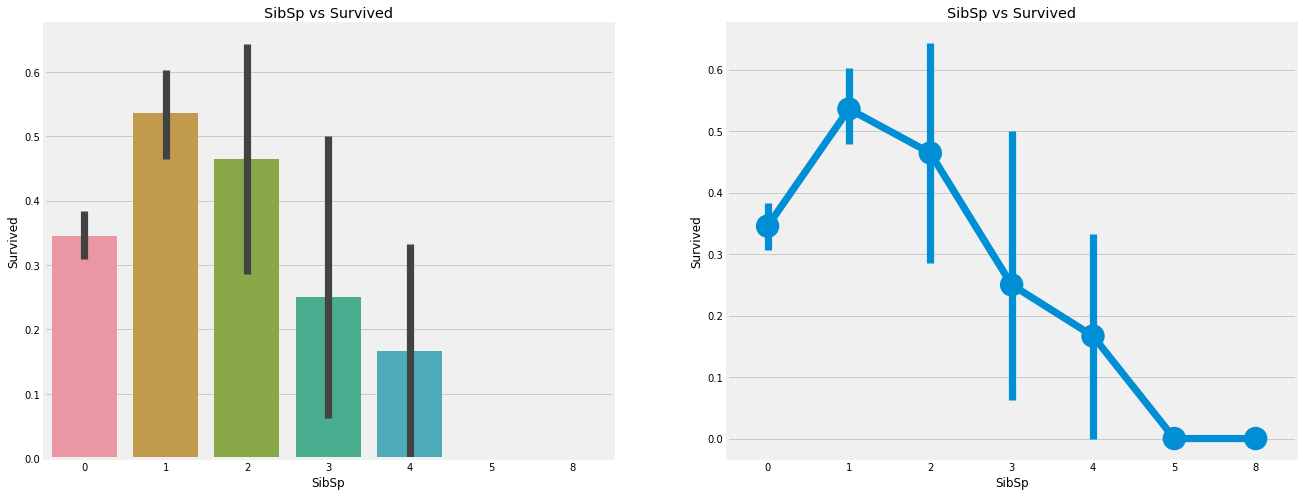

In [30]:
f, ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [31]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


관측치 :  
barplot과 factorplot을 보면 승객에 형제 없이 혼자 탑승한 경우 생존률이 34.5%다. 형제자매의 수가 증가하면 그래프는 대략적으로 감소한다. 말이 된다. 즉, 내게 가족이 있다면, 내 자신을 먼저 구하지 않고 그들을 구하려고 노력할 것이다. 놀랍게도 5~8인 가족의 생존률은 0%다.  

그 이유는 Pclass다. crosstab은 Person with SibSP > 3이 모두 Pclass 3에 있었다는 것을 보여준다. Pclass 3의 모든 대가족이 사망할 것이 임박했다. 

### Parch

In [32]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


crosstab에서 대가족은 Pclass 3에 있다는 것을 다시 보여준다.

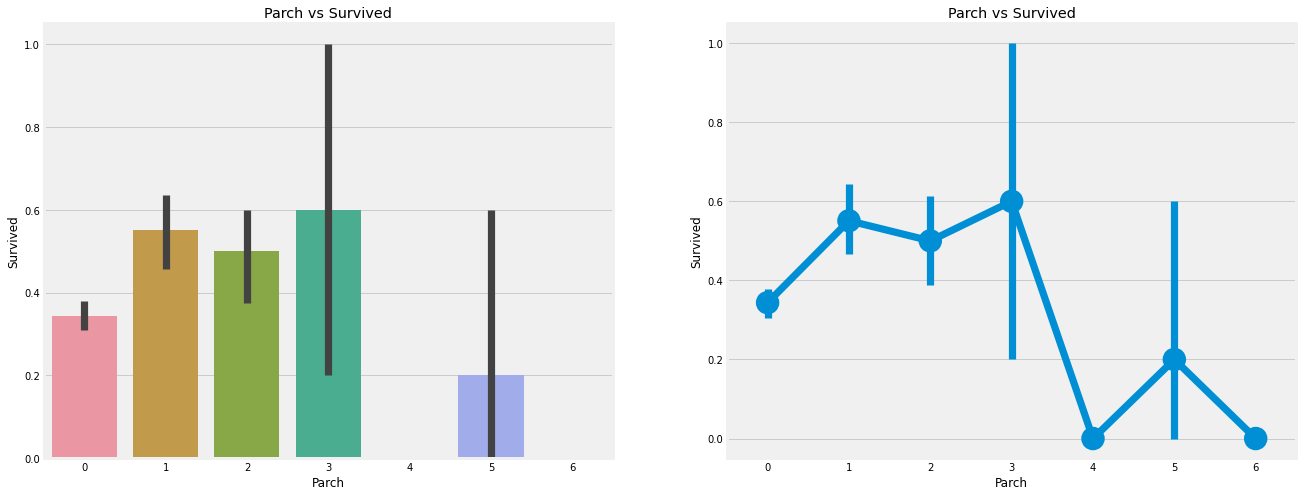

In [33]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

관측치 :  
여기도 결과는 꽤 비슷하다. 부모를 태운 승객은 생존률이 높다. 하지만 숫자가 올라갈수록 줄어든다.  
생존 가능성은 1-3명의 부모를 둔 사람에게 좋다. 혼자 있는 것 또한 치명적이며 누군가가 4명 이상의 부모를 데리고 있을때 생존 가능성이 줄어든다. 

### Fare -> Continous Feature

In [34]:
print('Highest Fare was : ', data['Fare'].max())
print('Lowest Fare was : ', data['Fare'].min())
print('Average Fare was : ', data['Fare'].mean())

Highest Fare was :  512.3292
Lowest Fare was :  0.0
Average Fare was :  32.2042079685746


가장 낮은 요금은 0으로 무료 승차다!

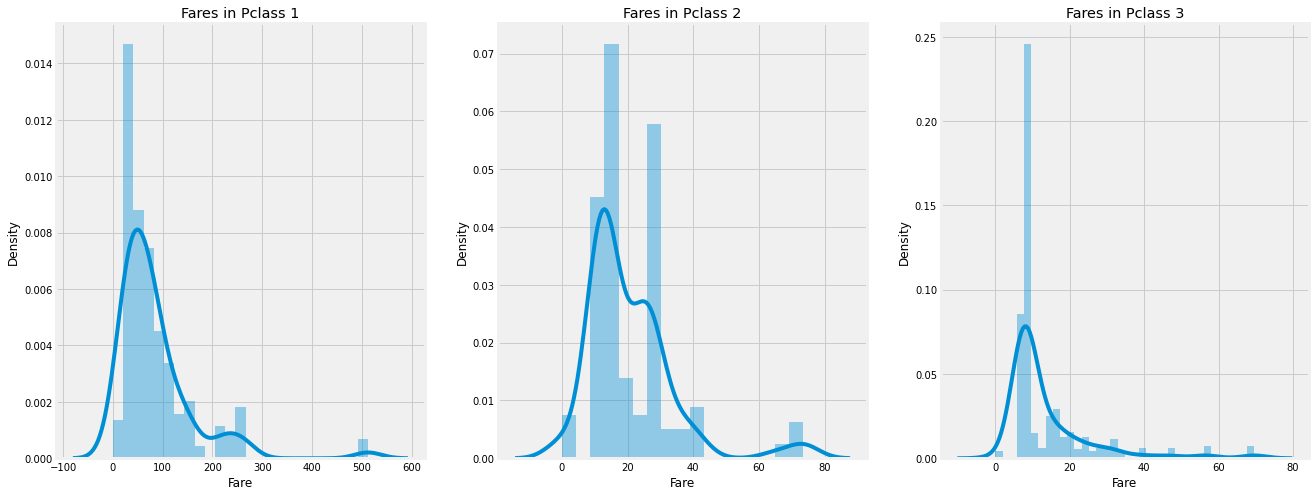

In [35]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass 1의 승객 운임에 큰 분포가 있는 것으로 보이며, 기준이 줄어들면서 이러한 분배는 계속 감소하고 있다. 이 또한 연속적이기 때문에, binning을 사용해 이산값으로 변환할 수 있다.  

모든 feature에 대하 관측치 :  
- Sex : 여성의 생존률은 남성보다 높다. 
- Pclass : 일등석 승객이 생존할 수 있는 기회가 있다는 뚜렷한 추세가 있다. Pclass 3의 생존률은 매우 낮다. 여성의 경우 Pclass 1의 생존률은 거의 1이며, Pclass 2의 생존률도 높다. 돈이 이긴다!
- Age : 5살에서 10살 미만의 어린이들은 생존할 가능성이 높다. 15세에서 35세 사이의 승객들은 많이 죽었다. 
- Embarked : 이것은 매우 흥미로은 feature다
- Parch + SibSp : 1-2명의 형제자매, 배우자 또는 1-3명의부모가 혼자 있거나 함께 여행하는 대가족보다 생존률이 더 높다. 

### Correlation Between the Features

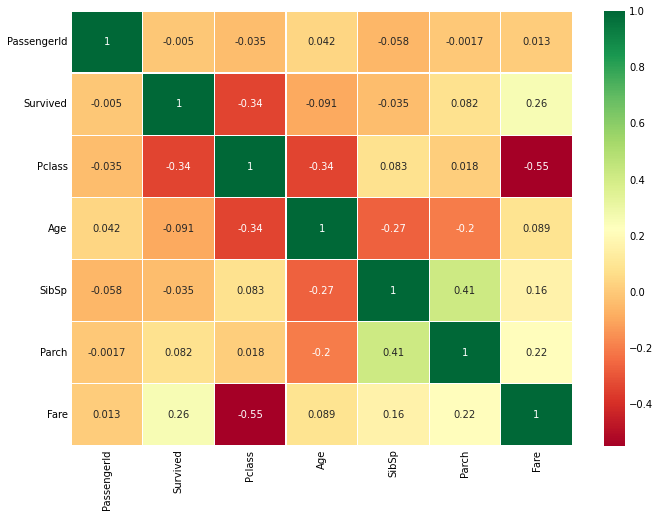

In [36]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)  # data.corr() --> correlation matrix
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

히트맵 해석  
첫 번째로 주목할 점은 알파벳이나 문자열의 상관관계가 분명하지 않기 때문에 숫자적인 특징만 비교한다는 것이다. 그림을 이해하기 전에, 정확한 상관관계가 무엇인지 알아보자.  
- 양의 상관관계 : 형상 A의 증가가 형상 B의 증가로 이어진다면 형상 A는 양의 상관관계가 있는 것이다. 값 1은 완벽한 양의 상관관계를 의미한다. 
- 음의 상관관계 : 형상 A의 증가가 형상 B의 감소로 이어진다면 형상 A는 음의 상관관계까 있는 것이다. 값 -1은 완벽한 음의 상관관계를 의미한다.  

이제 두 feature가 고도로 또는 완벽하게 상관되어 있으므로 하나가 증가하면 다른 하나도 증가한다고 가정해보자. 즉, 두 feature 모두 매우 유사한 정보를 포함하고 있으며 정보의 편차가 거의 또는 전혀 없다. 두 가지 모두 동일한 정보를 포함하고 있기 때문에 이를 MultiColinarity라고 한다.  

그럼 둘 중 하나는 중복아럿 둘 다 사용해야 한다고 생각하는가? 모델을 만들거나 학습하는 동안 중복 feature를 제거하려고 노력해야 한다. 중복 feature 제거가 학습시간을 줄이고 많은 이점을 주기 때문이다. 

위의 히트맵을 통해 우리는 feature들이 크게 상관되어 있지 않다는 것을 알 수 있다. 가장 높은 상관관계는 Sibsp와 Parch, 즉 0.41이다. 그래서 우리는 모둔 feature를 가져갈 수 있다. 

## Part2: Feature Engineering and Data Cleaning
이제 피처 엔지니어링이란 무엇일까?  
피처가 포함된 데이터셋이 제공될 때마다 모든 피처가 중요할 필요는 없다. 제거되어야 할 중복 피처가 많을 수도 있다. 또한 우리는 다른 피처에서 정보를 관찰하거나 추출해 새로운 피처를 얻거나 추가할 수 있다.  
예를 들어 이름 피처를 사용해 이니셜 피처를 가져오는 것이 있다. 몇 가지 새로운 피처를 사용하고 몇 가지 피처를 제거할 수 있는지 살펴보자. 또한 기존 관련된 피처를 예측 모델링에 적합한 형태로 변환하자. 

### Age-band
앞서 언급했듯이, 나이는 연속적인 피처다. 머신 러닝 모델에서 연속 변수는 문제가 있다.  
예 : 스포츠인을 성별에 따라 분류하거나 배열하라고 하며 쉽게 남녀로 구분할 수 있다. 만약 그들을 연령별로 분류하라고 하면 어떻게 할 것인가? 인원이 30명이 경우 연령 값은 30명이 될 수 있다. 이게 문제가 된다.  
우리는 binning 혹은 정규화를 통해 이러한 연속 값을 범주형 값으로 변환할 필요가 있다. binning, 즉 다양한 연령을 단일 bin으로 그룹화하거나 단일 값을 할당한다.  
최고령 탑승자는 80세였다. 그래서 0에서 80까지의 범위를 5개의 bin으로 나누자. 

In [37]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [38]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')  # checking the number of passengers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


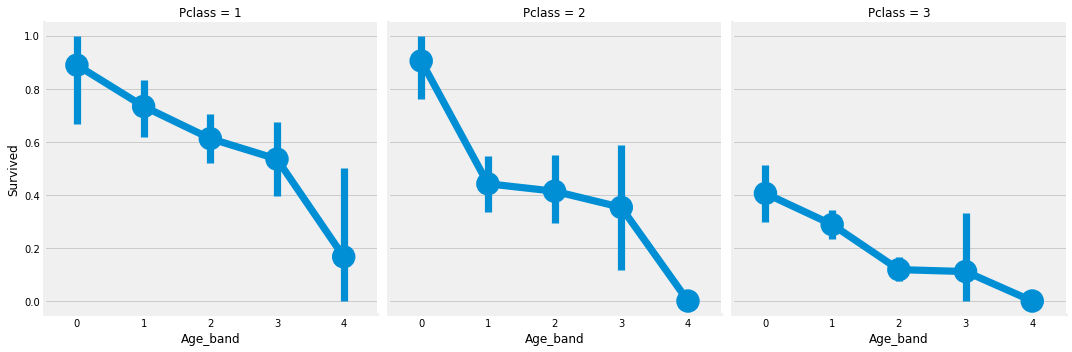

In [39]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

생존률은 Pclass에 관계없이 나이가 증가함에 따라 감소한다. 

### Family_Size and Alone
이 때 Family_Size 및 Alone이라는 새로운 피처를 만들어 분석할 수 있다. 이 피처는 Parch와 SibSp의 합이다. 생존률이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 결합된 데이터를 제공한다.

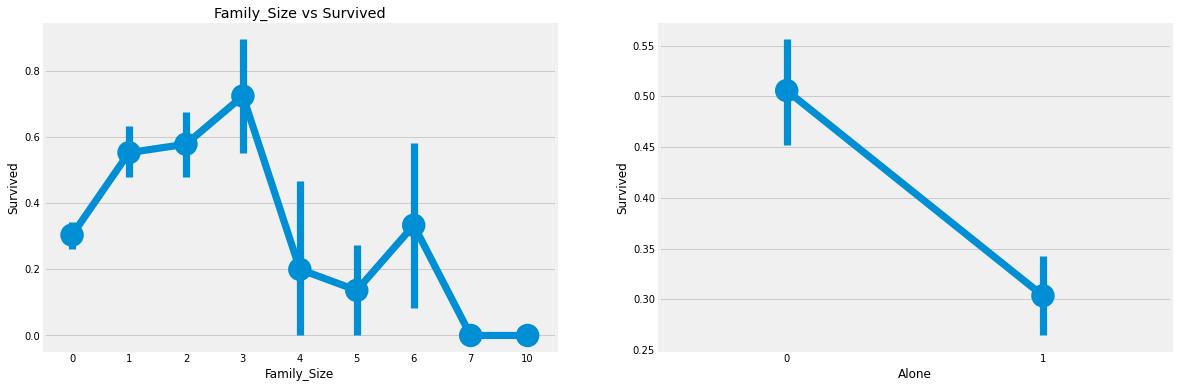

In [40]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']  # family size
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1  # Alone

f, ax = plt.subplots(1, 2, figsize=(18,  6))
sns.pointplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot('Alone', 'Survived', data=data, ax=ax[1])
plt.close(2)
plt.close(3)
plt.show()

Family_Size=0은 승객이 혼자라는 것을 의미한다. 분며히 혼자거나 Family_Size=0이면 생존률이 매우 낮다. Family_Size가 4보다 커도 생존률이 줄어든다. 이 또한 이 모델에 중요한 피처가 될 것으로 보인다. 이것을 좀 더 검토해보자. 

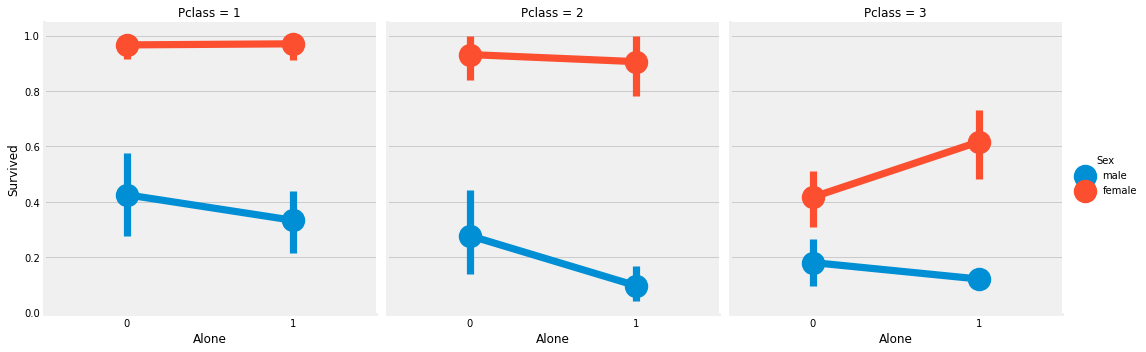

In [41]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

가족이 있는 여성보다 혼자 있을 확률이 높은 Pclass 3를 제외하면 성별과 Pclass를 불문하고 혼자 있는 것이 유해하다는 것이 눈에 띈다. 

### Fare_Range
운임도 연속적인 피처기 때문에 순서 값으로 변환해야 한다. 우리는 pandas.qcut을 사용할 것이다.  
qcut은 우리가 통과한 bin의 수에 따라 값을 분할하거나 배열한다. 따라서 5개의 bin을 통과하면 값이 5개의 개별 bin 혹은 값 범위로 균등하게 배열된다. 

In [42]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 논의한 바와 같이, 우리는 운임범위가 높아질수록 생존률이 높아진다는 것을 분명히 알 수 있다.  
현재 상태로는 Fare_Range 값을 전달할 수 없다. 우리는 그것을 Age_band와 같은 싱글톤 값으로 변환해야 한다. 

In [43]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

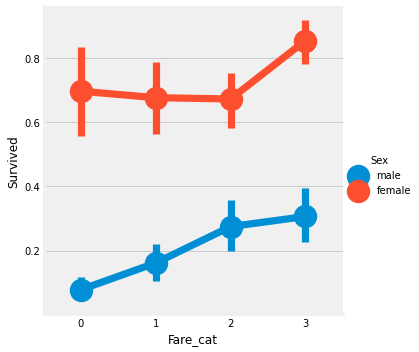

In [44]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

분명히, Fare_cat이 증가할수록 생존률이 높아진다. 이 피처는 Sex와 함께 모델링하는 동안 중요한 피처가 될 수 있다.

### Converting Stirng Values into Numeric
머신러닝 모델에 문자열을 전달할 수 없으므로 Sex, Embarked 등의 피처를 숫자 값으로 변환해야 한다. 

In [45]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### Dropping UnNeeded Features

- Name : 범주형 값으로 변환할 수 없으므로 필요 없다. 
- Age : Age_band가 있기 때문에 필요 없다.
- Ticket : 분류할 수 없는 임의의 문자열이다. 
- Fare : Fare_cat이 있기 때문에 필요 없다. 
- Cabin : NaN 값이 많고 승객이 여러 객실을 가질 수 있기 때문에 쓸모가 없다. 
- Fare_Range : Fare_cat이 있다. 
- PassengerId : 분류할 수 없다. 

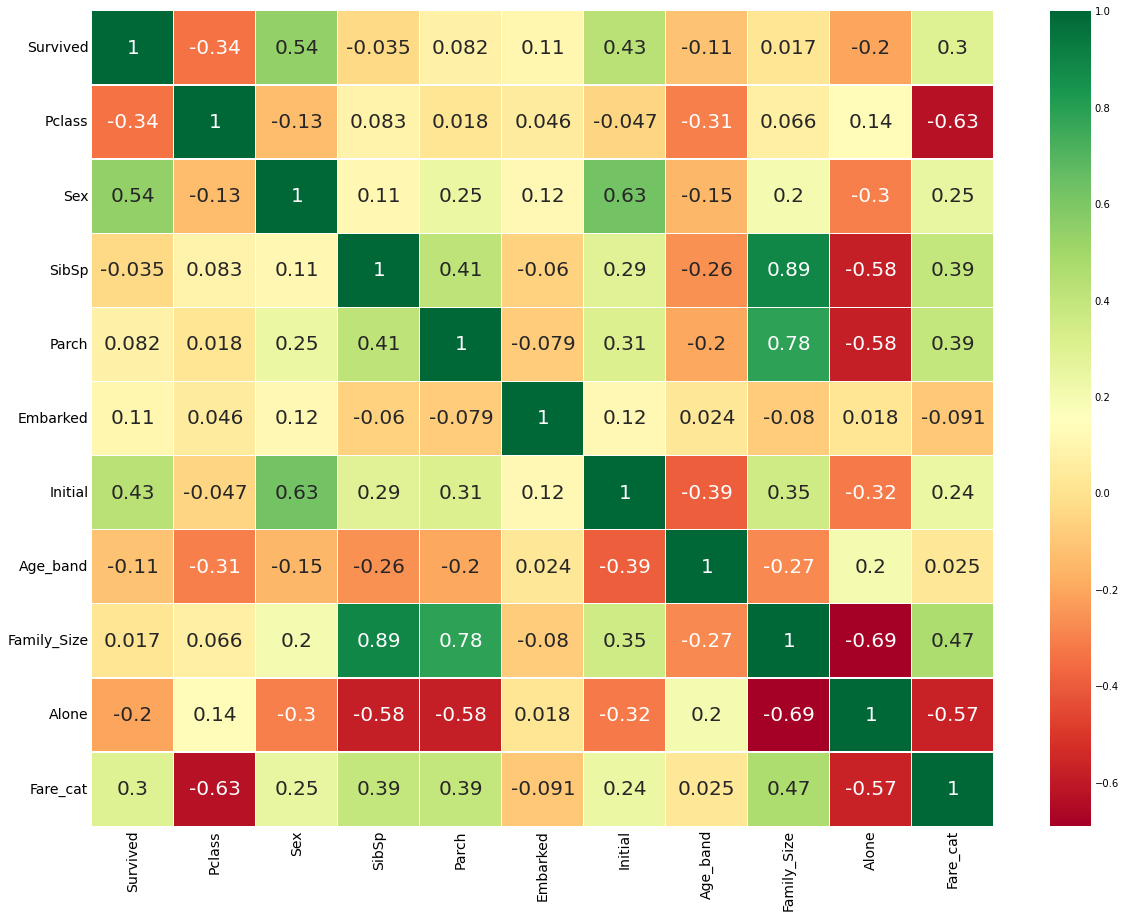

In [46]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

위의 상관관계도를 보면 양으로 연관된 몇 가지 피처를 알 수 있다. 일부는 SibSp and Family_Size이고, 일부는 Parch and Family이고 일부는 Alone과 Family_Size같은 부정적인 것이다. 

## Part3: Predictive Modeling
우리는 EDA 부분에서 몇 가지 인사이트를 얻었다. 하지만 그것으로는 탑승자가 생존할지 사망할지 정확하게 예측할 수 없다. 이제 우리는 훌륭한 분류 알고리즘을 사용해 승객의 생존 여부를 예측하자. 모델을 만들기 위해서 사용할 알고리즘은 다음과 같다. 
1. 로지스틱 회귀 분석
2. 서포트 벡터 머신(선형 및 방사형)
3. 랜덤 포레스트
4. K-Nearest Neighbors
5. Naive Bayes
6. 의사 결정 트리
7. 로지스틱 회귀 분석

In [47]:
# 필요한 머신러닝 패키지들 import
from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀 분석
from sklearn import svm  # support vector Machine
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.naive_bayes import GaussianNB  # Naive bayes
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.model_selection import train_test_split  # training and testing data split
from sklearn import metrics  # accuracy measure
from sklearn.metrics import confusion_matrix  # for confusion matrix

In [48]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [49]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [50]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [51]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Decision Tree

In [52]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


### K-Nearest Neighbours(KNN)

In [53]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


KNN 모델의 정확도는 n_neighbors 값을 조절하면 변화한다. 기본값은 5다. n_neighbors의 여러 값에 따른 정확도를 체크해보자. 

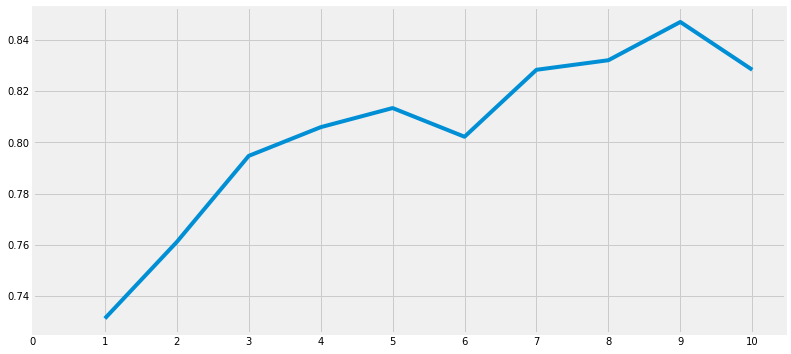

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [54]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayes

In [55]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [56]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8208955223880597


모델의 정확도가 분류기의 robustness를 결정하는 유일한 요소는 아니다.  
분류기가 훈련 데이터로 학습하고, 테스트 데이터로 테스트했을때, 정확도가 90%였다고 하자.  
분류기의 정확도가 매우 높은 것으로 보인다. 하지만 다른 테스트 셋에 대해서도 90%가 나올까?  
그렇지 않다. 분류기가 학습하기 위해 인스턴스를 사용할지 결정할 수 없기 때문이다.  
훈련 데이터와 테스트 데이터가 변하면, 정확도도 변하게 된다. 이것을 Model Variance라고 한다.  
이런 점을 극복하고 일반화된 모델을 얻기 위해 우리는 Cross Validation(교차검증)을 사용한다. 

### Cross Validation (교차검증)
많은 경우에, 데이터는 불균형하다. 많은 수의 class 1 객체들이 존재하지만 다른 class의 객체들은 적을 수 있다.  
그렇기 때문에 데이터셋 각각의 모든 객체에 알고리즘을 훈련시키고 테스트해야 한다.  
그 대, 우리는 각 데이터셋에서 나온 정확도들의 평균을 이용할 수 있다.  
1) K-Fold Cross Validation에서는 먼저 데이터셋을 K개의 서브 데이터셋으로 나눈다.  
2) 우리가 데이터셋을 5개로 나눴다고 하면, 1개의 은 테스트용으로 나머지 4개는 훈련용으로 사용한다.  
3) 각 수행시마다 테스트 셋을 바꿔주고, 다른 셋에 대해 알고리즘을 훈련시키면서 이 프로세스를 계속해나간다. 정확도와 오차는 평균화되어 알고리즘의 평균 정확도를 얻을 수 있다. 이것은 K-Fold Cross Validation이라고 한다.  
4) 일부 데이터셋에서는 underfit(과소적합), 다른 데이터셋에서는 overfit(과대적합)될 수 있다. 때문에 cross validation을 통해서, 우리는 일반화된 모델을 얻을 수 있다. 

In [57]:
from sklearn.model_selection import KFold # K-Fold Cross Validation 
from sklearn.model_selection import cross_val_score # 점수 평가
from sklearn.model_selection import cross_val_predict # 예측

kfold = KFold(n_splits = 10, shuffle=True, random_state = 22) # k = 10 , 데이터셋을  동일 크기의 10개의 서브셋으로 나눕니다.
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree',
              'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), 
                 KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(),
                 RandomForestClassifier(n_estimators=100)]
for i in models :
    model = i 
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
    cv_result = cv_result 
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean' : xyz, 'Std' : std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.801373,0.048082
Naive Bayes,0.795843,0.054861
Random Forest,0.805880,0.045837


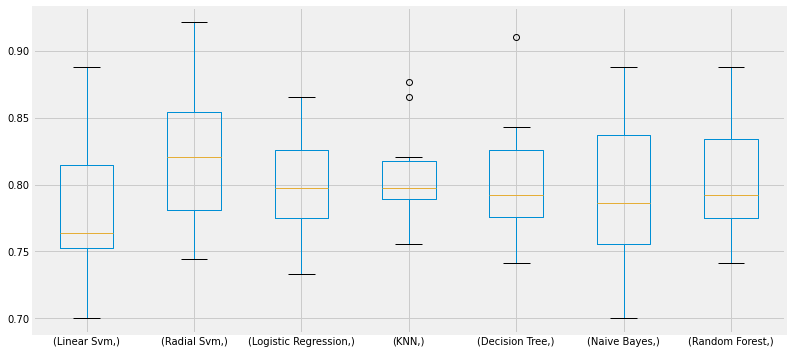

In [58]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

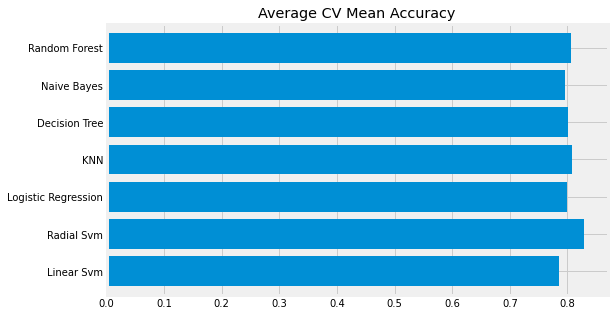

In [59]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도는 데이터 불균혀응로 인해 잘못된 결론을 낼 수 있다. 혼동행렬을 이용해 요약된 결과를 얻을 수 있는데, 이 혼동행렬은 모델이 어디에서 잘못되었는지, 어떤 클래스를 잘못 예측했는지를 보여준다. 

### Confusion Matrix
혼동행렬은 분류기에 의해 나온 정확한, 또는 부정확한 분류의 개수를 보여준다. 

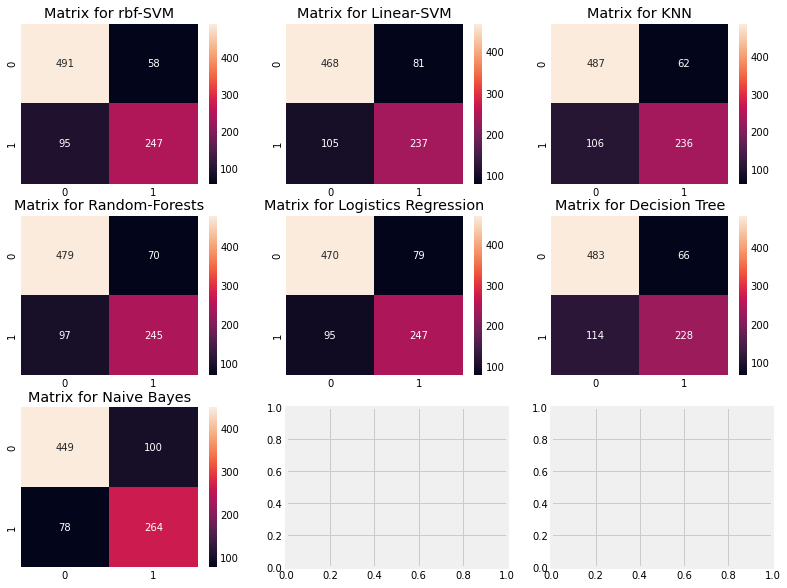

In [60]:
f, ax = plt.subplots(3, 3, figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True, fmt = '2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,1], annot=True, fmt = '2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,2], annot=True, fmt = '2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,0], annot=True, fmt = '2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,1], annot=True, fmt = '2.0f')
ax[1,1].set_title('Matrix for Logistics Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,2], annot=True, fmt = '2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[2,0], annot=True, fmt = '2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace = 0.2)
plt.show()

#### 혼동행렬의 해석
왼상단-우하단 대각선은 각 객체에 대해 정확한 예측의 수, 우상단-좌하단 대각선은 잘못된 예측의 수를 말한다. 첫 번째 plot의 rbf-SVM을 보자. 
1) 정확한 예측의 수는 491(사망) + 247(생존)으로 평균 CV 정확도(mean CV accuracy)는 (491+247)/891 = 82.8%다.  
2) Errors(오류) --> 58명의 사망자들이 생존자로 분류되었고, 95명의 생존자들이 사망자로 분류되었다. 죽은 사람을 살아있다교 예측하면서 더 많은 실수가 발생했다.  
각각의 행렬을 보면 rbf-SVM이 사망자를 예측하는데 보다 정확하다고 볼 수 있다.  
반면, Naive Bayes는 생존자를 예측하는데 보다 정확했다. 

#### 하이퍼 파라미터 튜닝
머신러닝 모델은 블랙박스같다. 이 블랙박스에는 기본 파라미터 값이 있는데, 우리는 이것을 조절함으로써 더 좋은 모델을 얻을 수 있다.  
SVM 모델의 C와 gamma같이 다른 분류기에는 다른 파라미터들이 있는데, 이들을 하이퍼 파라미터라고 한다.  
이 하이퍼 파라미터를 튜닝해서 모델의 학습률을 변경해줄 수 있고, 더 좋은 모델을 얻을 수 있다. 이것을 하이퍼 파라미터 튜닝이라고 한다.  
좋은 결과를 보였던 2개 분류기(SVM, Random Forest)의 하이퍼 파라미터를 튜닝해보자. 

### SVM

In [61]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel' : kernel, 'C' : C, 'gamma' : gamma}
gd=GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


### Random Forest

In [62]:
n_estimators = range(100, 1000, 100)
hyper = { 'n_estimators' : n_estimators }
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


rbf-SVM의 최고 점수는 C=0.4, gamma=0.3일 때인 82.82%이고, RandomForest는 n_estimator=300인 81.93%다. 

### Ensembling
앙상블은 모델의 정확도와 성능을 높이기 위한 좋은 방법이다. 
간단한 말로, 하나의 강력한 모델을 만들기 위한 여러 단순한 모델의 조합이다.  
핸드폰을 사기 위해 많은 사람들에게 여러 파라미터에 대해 질문을 했다고 가정하자.  
그 후 우리는 모든 다른 파라미터들을 분석한 뒤에 한 제품에 대한 강한 판단을 할 수 있을 것이다.  
이것이 모델의 안정ㅅ어을 향상시켜주는 앙상블이다. 앙상블은 다음의 방법으로 수행할 수 있다.  
1) Voting Classifier  
2) Bagging  
3) Boosting

### Voting Classifier
Voting Classifier는 많고 다양한 단순한 학습 모델로부터 예측들을 결합하는 가장 단순한 방법이다.  
예측값은 각 서브모델 예측치의 평균이다. 각 서브모델들은 다 다른 유형의 모델이다. 

In [63]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                                            ('RBF', svm.SVC(probability=True, kernel = 'rbf', C=0.5, gamma = 0.1)),
                                                                            ('RFor', RandomForestClassifier(n_estimators=900, random_state=0)),
                                                                            ('LR', LogisticRegression(C=0.05)),
                                                                            ('DT', DecisionTreeClassifier(random_state=0)),
                                                                            ('NB', GaussianNB()),
                                                                            ('svm', svm.SVC(kernel='rbf', probability = True)) ],
                                                        voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is: ', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score is ', cross.mean())

The accuracy for ensembled model is:  0.8208955223880597
The cross validated score is  0.8226716604244693


### Bagging
배깅은 일반적인 앙상블 방법이다.  
데이터셋의 작은 파티션에 대해 유사한 분류기들을 적용하고, 모든 예측치에 대한 평균을 적용함으로써 작용한다.  
평균화를 통해 분산이 감소된다. Voting Classifier와는 달리 배깅은 유사한 분류기를 사용한다. 

### Bagged KNN
배깅은 분산이 높은 모델에 가장 잘 작용한다. 그 예는 Decision Tree나 Random Forests다.  
우리는 n_neighbor의 작은 값을 적용해 KNN을 n_neighbors의 작은 값으로 사용해보자. 

In [64]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is: ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for bagged Decision Tree is: ', result.mean())

The accuracy for bagged Decision Tree is:  0.832089552238806
The cross validated score for bagged Decision Tree is:  0.8104244694132333


### Boosting
부스팅은 분류기의 순차적인 학습을 이용한 앙상블 기법이다. 순차적으로 약한 모델을 향상시켜나간다.  
부스팅은 아래와 같이 작동한다 : 
모델은 처음 전체 데이터셋에 대해 학습한다. 이 때 모델은 일부 객체는 올바르게, 일부 객체는 틀리게 예측할 것이다.  
그 다음 시행에서, 틀리게 예측한 객체에 더욱 가중치를 두어 학습한다. 결과적으로 틀리게 예측한 객체를 올바르게 예측하려고 노력한다.  
이런 과정이 반복되면서, 정확도가 한계에 도달할 때까지 새 분류기가 모델에 추가된다. 

### AdaBoost(Adaptive Boosting)
이번 케이스에서 약한 학습기는 Decision Tree다. 하지만 우리는 기본 base_estimator를 우리의 선택에 따라 다른 알고리즘으로 바꿀 수 있다. 

In [65]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is : ', result.mean())

The cross validated score for AdaBoost is :  0.8249188514357055


### Stochastic Gradient Boosting
이번에도 약한 학습기는 Decision Tree다. 

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate = 0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring = 'accuracy')
print('The cross validated score for Gradient Boosting is: ', result.mean())

The cross validated score for Gradient Boosting is:  0.8115230961298376


### XGBoost

In [67]:
import xgboost as xg

xgboost = xg.XGBClassifier(n_estimators=900, learning_rate = 0.1, verbosity=0)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is: ', result.mean())

The cross validated score for XGBoost is:  0.8115480649188515


AdaBoost가 가장 높은 정확도를 기록했다. 이 정확도를 하이퍼 파라미터 튜닝을 통해 더 높여보자. 

#### AdaBoost의 하이퍼 파라미터 튜닝

In [68]:
n_estimators = list(range(100, 1100, 100))
learning_rate = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


AdaBoost의 정확도는 n_estimator가 200, learning_rate = 0.05일때 83.16%로 가장 높았다. 

### 베스트 모델에 대한 혼동행렬

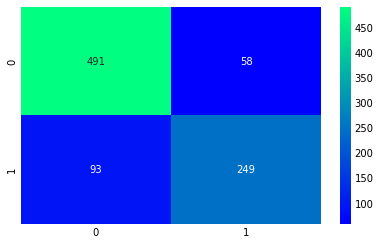

In [69]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0,learning_rate = 0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt = '2.0f')
plt.show()

## Feature Importance

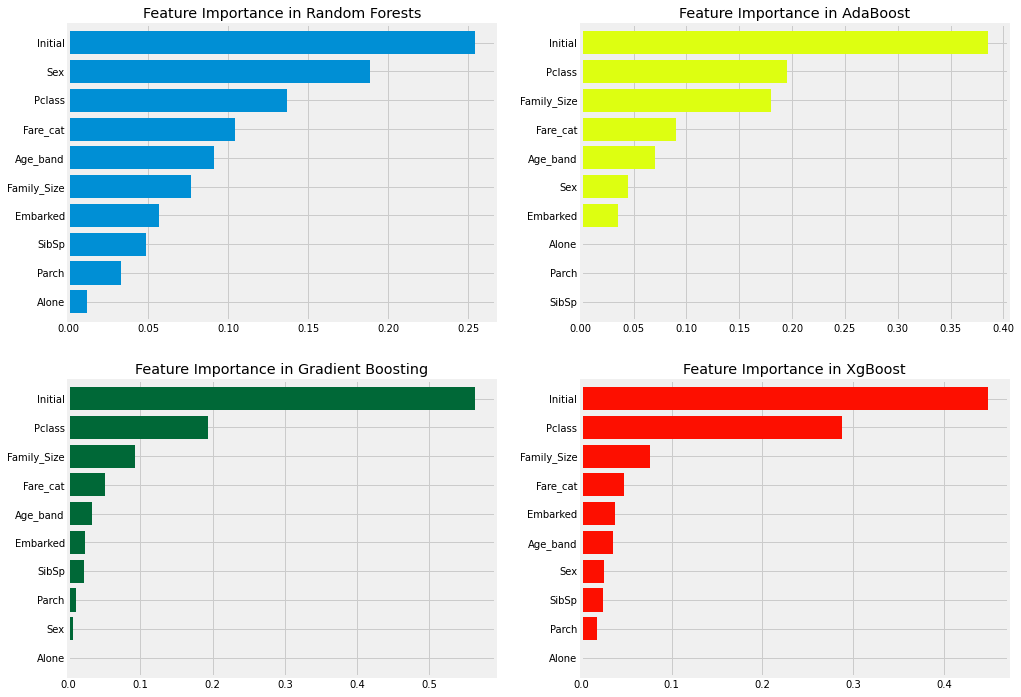

In [70]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

Random Forest, AdaBoost 등 여러 모델들에 대한 feature importance를 볼 수 있다. 
1) 공통적으로 중요한 feature는 Initial, Fare_cat, Pclass, Family_Size다.  
2) Sex는 그렇게 중요도가 높지 않았는데, 앞선 분석에서 Pclass와 함께 보았을 때 성별이 중요한 요소였던 것을 생각하면 놀라운 결과다. 성별은 Random Forest 몯레에서만 중요해보인다. 하지만 많은 분류기의 최상단에 있는 Initial은 Sex와 양의 상관관계에 있다. 결국, 두 정보 모두 성별에 대한 정보를 담고 있다.  
3) 이와 비슷하게 Pclass와 Fare_cat 모두 탑승객의 지위와 Family_Size, Alone, Parch, SibSp의 정보를 담고 있다. 